# import libraries

In [57]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [58]:
df = pd.read_csv('E://dataset//baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


Let us add a new column; RD, which shows the difference between RS(Runs Scored), and RA(Runs Allowed).
Let’s also make sure we only have pre-’Moneyball’ data, this can be done by only including data from 
before the 2002 regular seasond

In [59]:
# add run difference columns
df['RD'] = df['RS'] - df['RA']
# only above 2002 data
df = df[df.Year< 2002]

In [60]:
# checking missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 330 to 1231
Data columns (total 16 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null int64
RS              902 non-null int64
RA              902 non-null int64
W               902 non-null int64
OBP             902 non-null float64
SLG             902 non-null float64
BA              902 non-null float64
Playoffs        902 non-null int64
RankSeason      154 non-null float64
RankPlayoffs    154 non-null float64
G               902 non-null int64
OOBP            90 non-null float64
OSLG            90 non-null float64
RD              902 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 119.8+ KB


In [61]:
# missing values handling
X_np=df.iloc[:,:].values# converted to numpy
X_np
# getting columns for missing values
cols=['OOBP','OSLG','RankSeason','RankPlayoffs']
nan=[]
for i in cols:
#     print(i)
     a=df.columns.get_loc(f"{i}")
     nan.append(a)
# getting columns for string vALUES
nan

[13, 14, 10, 11]

In [62]:
# solving missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)#nan use for recognise missing values,strage default is mean and median,most frequent can also be used
#axis =0 for impute along cols and axis =1 for along the rows
X_np[:,nan]=imputer.fit_transform(X_np[:, nan])#transform for replace missing values with stragey

In [63]:
dfs=pd.DataFrame(X_np,columns=df.columns)# with missing values
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 16 columns):
Team            902 non-null object
League          902 non-null object
Year            902 non-null object
RS              902 non-null object
RA              902 non-null object
W               902 non-null object
OBP             902 non-null object
SLG             902 non-null object
BA              902 non-null object
Playoffs        902 non-null object
RankSeason      902 non-null object
RankPlayoffs    902 non-null object
G               902 non-null object
OOBP            902 non-null object
OSLG            902 non-null object
RD              902 non-null object
dtypes: object(16)
memory usage: 112.8+ KB


plot the Run Difference vs Wins 

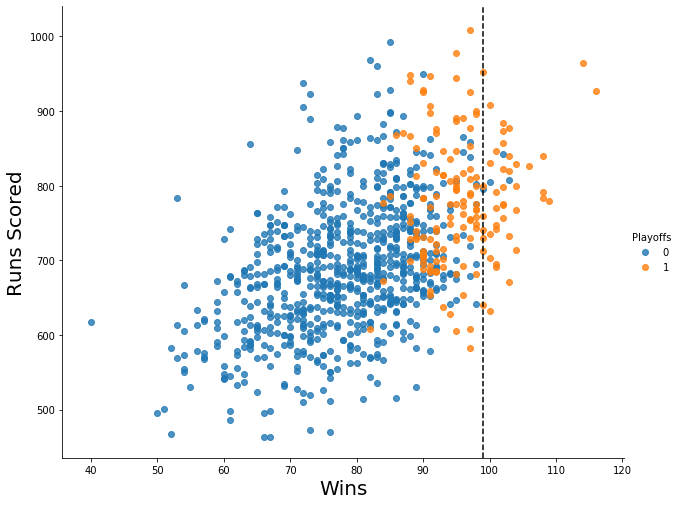

In [64]:
sns.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=df,height=7, aspect=1.25)
plt.xlabel("Wins", fontsize = 20)
plt.ylabel("Runs Scored", fontsize = 20)
plt.axvline(99, color = "Black", ls = '--')
plt.show()

simple scatterplot

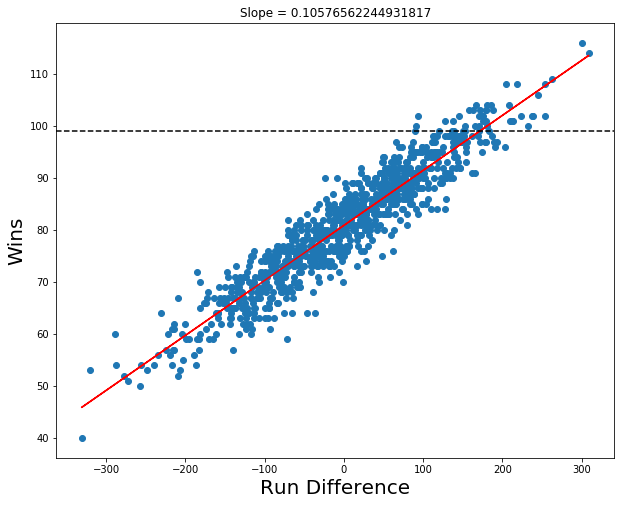

In [65]:
x = np.array(df.RD)
y = np.array(df.W)
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'r')
plt.title("Slope = %s" % (slope), fontsize = 12)
plt.xlabel("Run Difference", fontsize =20)
plt.ylabel("Wins", fontsize = 20)
plt.axhline(99, 0, 1, color = "k", ls = '--')
plt.show()


to check corelation

In [66]:
corrcheck = df[['RD', 'W', 'Playoffs']].copy()
corrcheck.corr(method='pearson')

,RD,W,Playoffs
RD,1.000000,0.938515,0.566274
W,0.938515,1.000000,0.588978
Playoffs,0.566274,0.588978,1.000000


In [67]:
# corelation of attacking features
podesta = df[['OBP','SLG','BA','RS']]
podesta.corr(method='pearson')

,OBP,SLG,BA,RS
OBP,1.000000,0.806154,0.854055,0.904909
SLG,0.806154,1.000000,0.814068,0.926384
BA,0.854055,0.814068,1.000000,0.831625
RS,0.904909,0.926384,0.831625,1.000000


# MODEL BUIDING FOR RUNS SCORED

In [68]:
x = df[['OBP','SLG']].values# we dont take batting average as it is not that much correleated to runs score
y = df[['RS']].values 
run_score = LinearRegression() 
run_score.fit(x,y)
print(Runs.intercept_) 
print(Runs.coef_)

[-804.62706106]
[[2737.76802227 1584.90860546]]


$ RS = -804.627 + (2737.768×(OBP)) + (1584.909×(SLG))$

In [69]:
# MODEL FOR RUN ALLOWED

In [70]:
x = dfs[['OOBP','OSLG']].values
y = dfs[['RA']].values
run_allow = LinearRegression()
run_allow.fit(x,y)
 
print(RunsAllowed.intercept_)
print(RunsAllowed.coef_)

[-943.13524264]
[[2913.59948582 1514.28595842]]


# linear model between runs difference and wins

In [71]:
x = df[['RD']]
y = df[['W']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,shuffle=True)
Wins = LinearRegression()
Wins.fit(xtrain,ytrain)
ypred=Wins.predict(xtest)
print(Wins.intercept_)
print(Wins.coef_)
rmse=np.sqrt(mean_squared_error(ypred,ytest))
print("root mean square error :",rmse)

[80.76915393]
[[0.10684983]]
root mean square error : 3.9594967414812263


In [72]:
from sklearn.model_selection import train_test_split

X=df[['W']];Y=df[['Playoffs']]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,shuffle=True)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)
qualify=regressor.predict(xtest)

# Predict using random values of OOBP,OSLG,SLG,OBP

In [81]:
OBP=df['OBP']
SLG=df['SLG']
OOBP=dfs['OOBP']
OSLG=dfs['OSLG']
n=random.randint(0,len(df))
print(n)
OBP=OBP[n]
SLG=SLG[n]
OOBP=OOBP[n]
OSLG=OSLG[n]
RUNS_ALLOW=run_allow.predict([[OOBP,OSLG]])
RUNS_MADE=run_score.predict([[OBP,SLG]])
RUNS_MADE,RUNS_ALLOW
print("total run allowed",RUNS_MADE)
print("total run scored",RUNS_ALLOW)
print("total run difference",RUNS_MADE-RUNS_ALLOW)
RD=RUNS_MADE-RUNS_ALLOW
RD=RD.reshape(-1,1)

589
total run allowed [[715.797883]]
total run scored [[703.80931264]]
total run difference [[11.98857036]]


In [82]:
# predicting on new data whether qualify or not

WINS=Wins.predict(RD)
print("no of wins",WINS)
qualify=regressor.predict(WINS)
print("qualify prediction by model :", qualify)

# it is known from graph  above 95 wins has nearly always led to qualification
if WINS >=95 :
    print("qualify")
else:
    print("not qualify")

no of wins [[82.05013061]]
qualify prediction by model : [[0.19932668]]
not qualify


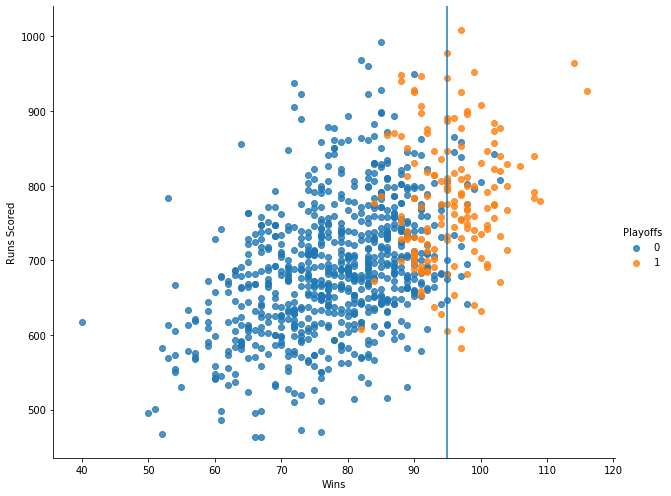

In [83]:
# verify 95 wins claim

# Plotting scatterplot with respect to playoff
sns.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=df,height=7, aspect=1.25)
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 95)

# WE KNOW NOW WINS ABOVE 95 IS NECESSARY FOR PLAYOFFS